# Loading Data

In [235]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [236]:
bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets['y']

Делим выборку на train и test.


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=228)

# Exploratory Data Analysis

In [238]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
44059,37,blue-collar,married,secondary,no,195,yes,no,NaN,1,jul,10,1,-1,0,NaN
43984,37,admin.,divorced,secondary,no,450,yes,yes,NaN,24,jun,15,1,-1,0,NaN
36608,44,blue-collar,single,secondary,no,25,yes,no,cellular,12,may,244,3,-1,0,NaN
26978,39,blue-collar,single,secondary,no,4619,no,no,cellular,21,nov,104,1,-1,0,NaN
29496,29,admin.,divorced,secondary,no,120,no,yes,cellular,3,feb,197,1,-1,0,NaN


In [239]:
y_train.sample(5)

6117     no
37624    no
28712    no
26172    no
20796    no
Name: y, dtype: object

## Target

Заменяем значения целевой переменной на 0 и 1.

In [240]:
y_train = y_train.map({'no' : 0, 'yes' : 1})
y_test = y_test.map({'no' : 0, 'yes' : 1})

In [241]:
y_train.sample(5)

14287    0
31191    1
28069    0
9110     0
38604    0
Name: y, dtype: int64

## Age

Проверим на отсутствие незаполненных полей.

In [242]:
X['age'].isna().any()

False

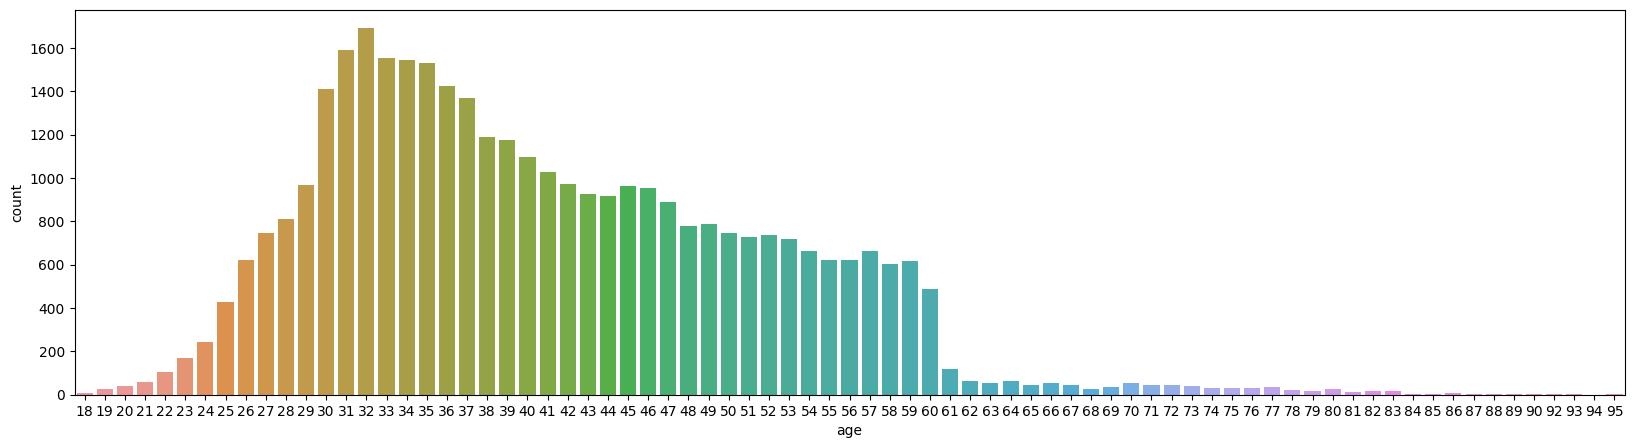

In [243]:
fig = plt.figure(figsize=(20, 5))
sns.countplot(data=X_train, x='age');

Нарисуем график зависимости среднего значения целевой переменной от возраста.

In [244]:
def mean_target_by_feature(feature_column):
    mean_target = pd.concat([feature_column, y_train], axis=1).groupby(feature_column.name, as_index=False).mean()
    return sns.lineplot(x=mean_target.iloc[:, 0], y=mean_target.iloc[:, 1])

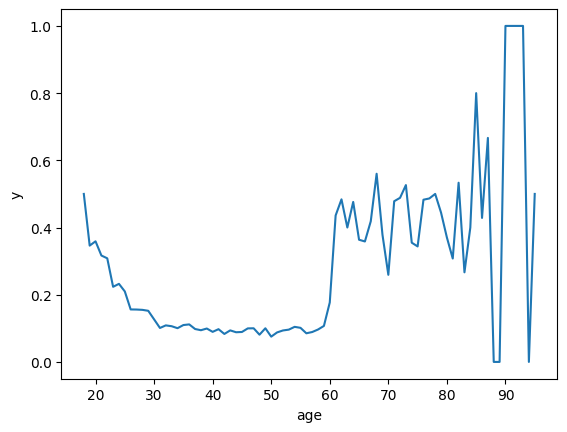

In [245]:
mean_target_by_feature(X_train['age']);

Линейной зависимости не наблюдается. Попробуем решить эту проблему.

Сгруппируем значения признака 'age' по десяткам лет (0-9, 10-19 и т.д.), $x$ → $x$ // 10 = $x'$. Теперь сформируем новый признак new_age_feature, который будет равняться $\frac{1}{30}(x')^2 - \frac{8}{30}x' + \frac{19}{30}$. Ниже виден график зависимости доли успехов ($y=1$) от признака new_age_feature. Теперь зависимость на графике близка к линейной.  

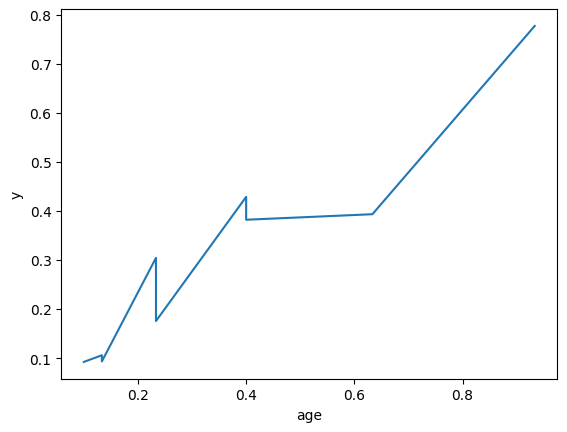

In [246]:
new_age_feature = (X_train['age'] // 10) ** 2 / 30 - 8 * (X_train['age'] // 10) / 30 + 19 / 30
mean_target_by_feature(new_age_feature);

Заменяем признак 'age' на 'new_age_feature'.

In [247]:
X_train['age'] = new_age_feature
X_test['age'] = (X_test['age'] // 10) ** 2 / 30 - 8 * (X_test['age'] // 10) / 30 + 19 / 30

## Job

Посчитаем количество пропущенных значений

In [248]:
X['job'].isna().sum()

288

В признаке 'job' оказалось всего 288 незаполненных полей, что составляет около 0.05% от =датасета, что позволяет нам выбросить строки с пропущенными значениями в столбце 'job'.

In [249]:
y_train = y_train[pd.notna(X_train['job'])]
y_test = y_test[pd.notna(X_test['job'])]
X_train = X_train[pd.notna(X_train['job'])]
X_test = X_test[pd.notna(X_test['job'])]

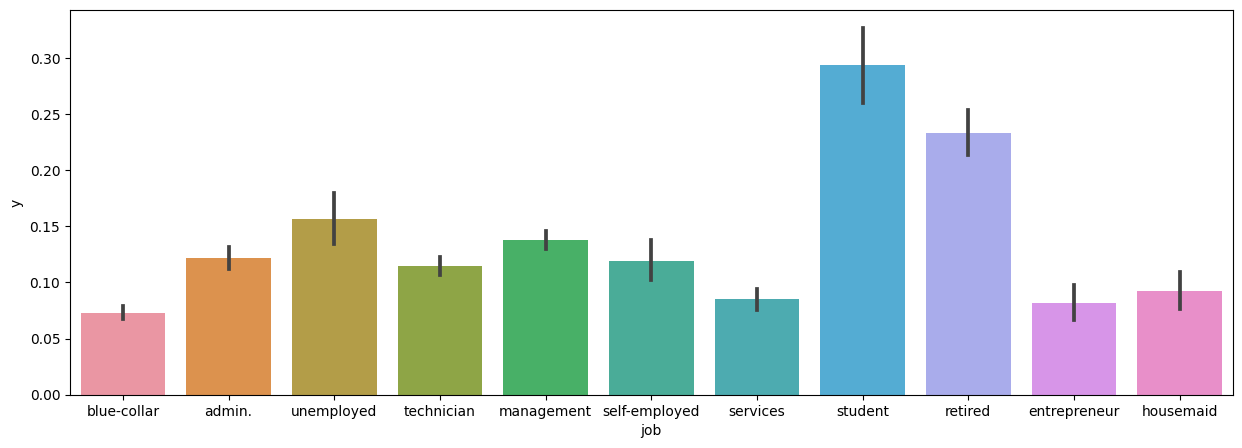

In [250]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(x=X_train['job'], y=y_train);

## Marital

In [251]:
X['marital'].isna().any()

False

Нет незаполненных полей.

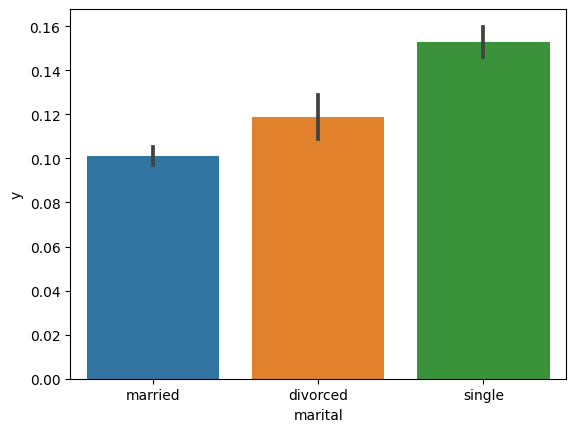

In [252]:
sns.barplot(x=X_train['marital'], y=y_train);

На диаграмме выше видим распределение среднего значения целевой переменной по всем возможным статусам поля 'marital'.

## Default

In [253]:
X['default'].isna().sum()

0

In [254]:
X_train['default'] = X_train['default'].map({'no' : 0, 'yes' : 1})
X_test['default'] = X_test['default'].map({'no' : 0, 'yes' : 1})

Nan отсутствуют, преобразуем значения из текста в числа и выведем результат на диаграмму.

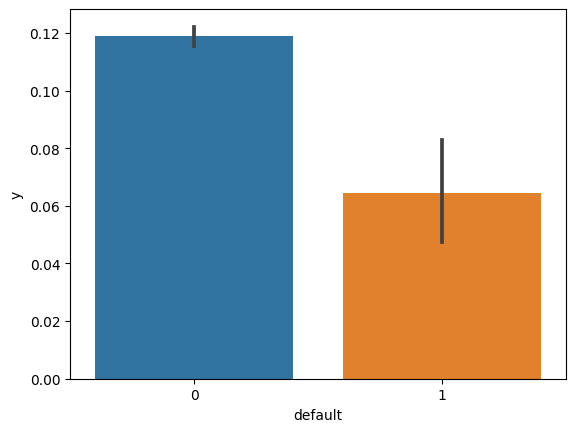

In [255]:
sns.barplot(x=X_train['default'], y=y_train);

## Housing

In [256]:
X['housing'].isna().any()

False

In [257]:
X_train['housing'] = X_train['housing'].map({'no' : 0, 'yes' : 1})
X_test['housing'] = X_test['housing'].map({'no' : 0, 'yes' : 1})

Проверили на отсутствие незаполненности, преобразовали текстовые данные из колонки 'housing' в числовые, выведем итог на диаграмме.

<Axes: xlabel='housing', ylabel='y'>

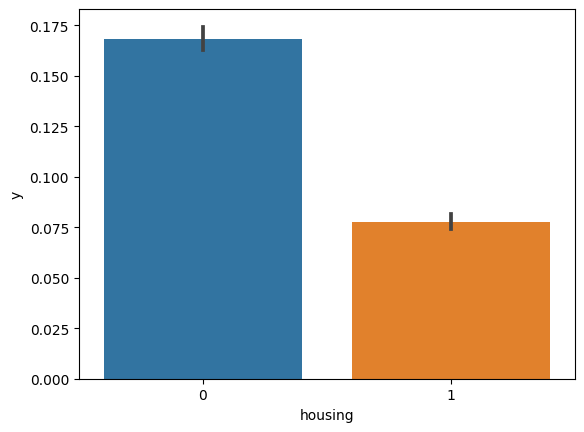

In [258]:
sns.barplot(x=X_train['housing'], y=y_train)

## Month

In [259]:
X['month'].isna().any()

False

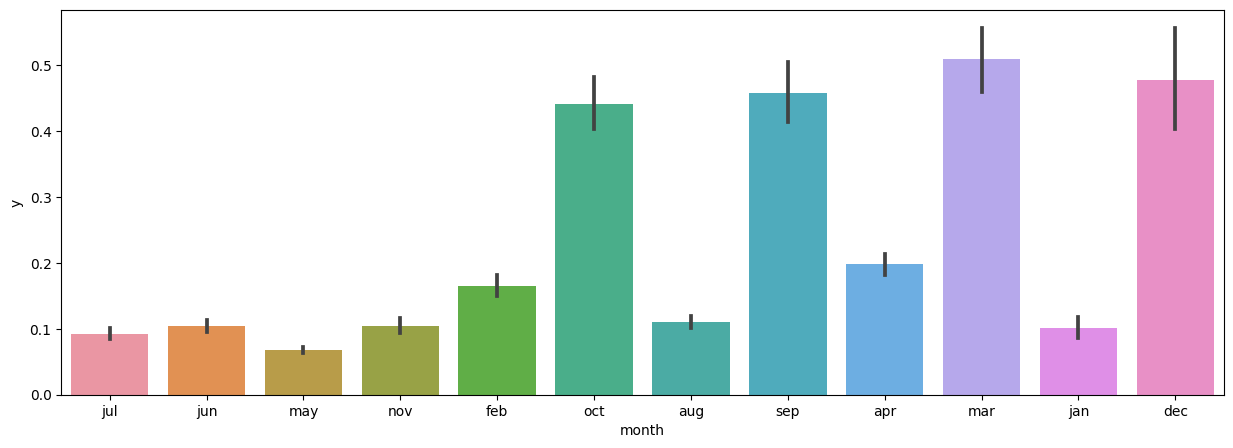

In [260]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(x=X_train['month'], y=y_train);

Аналогично предыдущему признаку используем Mean Target Encoding вместо One-Hot Encoding, ввиду большого количества различных значений признака.

In [261]:
target_enc_month = TargetEncoder()
X_train['month'] = target_enc_month.fit_transform(X_train['month'].map(str), y_train)
X_test['month'] = target_enc_month.transform(X_test['month'].map(str))

## Loan

In [262]:
X['loan'].isna().any()

False

In [263]:
X_train['loan'] = X_train['loan'].map({'no' : 0, 'yes' : 1})
X_test['loan'] = X_test['loan'].map({'no' : 0, 'yes' : 1})

Нет Nan-ов, преобразовали текстовые данные из колонки 'loan' в числовые, выведем итог на диаграмме.

<Axes: xlabel='loan', ylabel='y'>

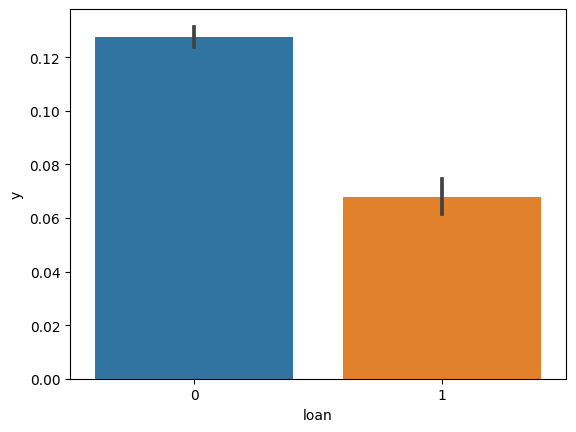

In [264]:
sns.barplot(x=X_train['loan'], y=y_train)

## Campaign

In [265]:
X['campaign'].isna().any()

False

In [266]:
X_train['campaign'].describe()

count    35929.000000
mean         2.767987
std          3.085041
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

In [267]:
X_train[X_train['campaign'] >= 30].shape[0]

54

Назовем выбросами те образцы, у которых поле 'campaign' больше 30, т.к. таких полей всего 54 и выбросим их из тренировочной выборки. Агрегируем значения признака следующим образом: X['campaign'] // 5, выведем на графике соответствующие группам средние значения целевой переменной, получаем что-то похожее на линейную зависимость.

In [268]:
y_train = y_train[X_train['campaign'] < 30]
X_train = X_train[X_train['campaign'] < 30]

<Axes: xlabel='campaign', ylabel='y'>

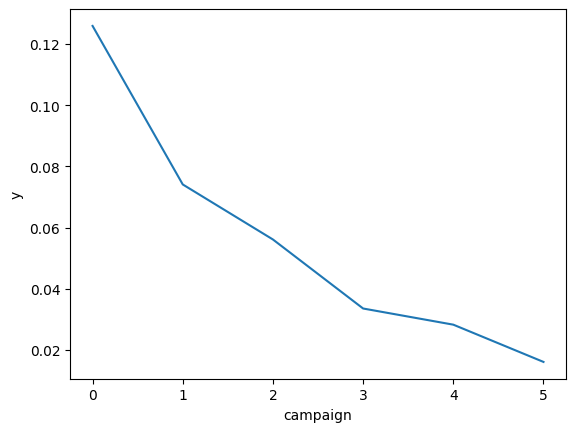

In [269]:
mean_target_by_feature(X_train['campaign'] // 5)

In [270]:
X_train['campaign'] = X_train['campaign'] // 5
X_test['campaign'] = X_test['campaign'] // 5

## Pdays

In [271]:
X['pdays'].isna().any()

False

## Previous

In [272]:
X['previous'].isna().any()

False

## Poutcome

In [273]:
X['poutcome'].isna().sum()

36959

Заметим, что в признаке 'poutcome' большое число незаполненных полей, поэтому, чтобы не терять информацию, будем воспринимать их как отдельное значение признака 'poutcome'.

<Axes: xlabel='poutcome', ylabel='y'>

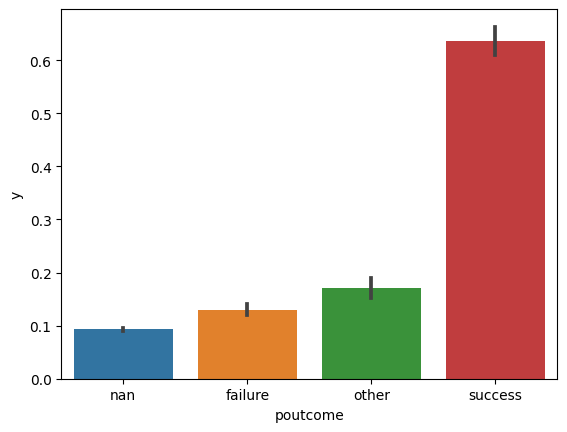

In [274]:
sns.barplot(x=X_train['poutcome'].fillna('nan'), y=y_train)

In [275]:
X_train['poutcome'] = X_train['poutcome'].fillna('unknown')
X_test['poutcome'] = X_test['poutcome'].fillna('unknown')

## Duration

Выбросим данный столбец в связи с тем, что в описании датасета указано следующее: "Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model."

In [276]:
X_train.drop(columns=['duration'], inplace=True)
X_test.drop(columns=['duration'], inplace=True)